### Malaria Image Classification

#### Malaria is a mosquito borne infectious disease that affects humans and other animals. It is caused by single celled microorganisms of the Plasmodium group.[2] The disease is most commonly spread by an infected female Anopheles mosquito
#### Symptoms typically include fever, tiredness, vomiting and headaches. In severe cases, it can cause yellow fever, seizures, coma and death.


### Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os
print(os.listdir("/Users/poonamarora/Desktop/Python/CNN/Datasets/cell_images"))

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

# Any results you write to the current directory are saved as output.


/Users/poonamarora/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['.DS_Store', 'Parasitized', 'Uninfected']


### Import dataset

In [2]:
filenames1 = os.listdir("/Users/poonamarora/Desktop/Python/CNN/Datasets/cell_images/Parasitized")
categories1 = []
for filename in filenames1:
    category = 'Parasitized'
    categories1.append('Parasitized')

### Declare Trainign Directory

In [13]:
train_dir="/Users/poonamarora/Desktop/Python/CNN/Datasets/cell_images"

### Data Visualization

### Take a sample from both the folders to see if we can differentiate the images by visual inpit

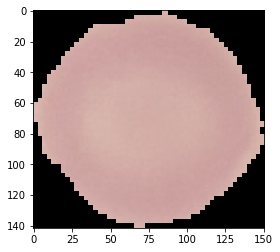

In [30]:
sample = random.choice(filenames2)
image = load_img("/Users/poonamarora/Desktop/Python/CNN/Datasets/cell_images/Uninfected/"+sample)
plt.imshow(image)

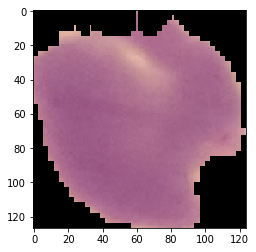

In [31]:
sample = random.choice(filenames1)
image = load_img("/Users/poonamarora/Desktop/Python/CNN/Datasets/cell_images/Parasitized/"+sample)
plt.imshow(image)

### Check if the folders have same amount of images

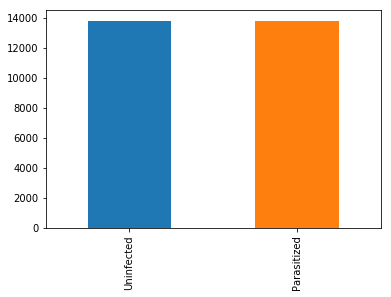

In [16]:
df['category'].value_counts().plot.bar()

### Model Building (CNN + Keras)

###### As we have seen before the random images of Parasitized and healthy cell, as humans we are able to see the difference. CNN is a technique which enables a machine to do the same task with utmost accuracy.
###### A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. 
###### The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.


#### Keras is high level neural network API,written in Python and capable of running on top of Tensorflow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
###### Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
###### Supports both convolutional networks and recurrent networks, as well as combinations of the two.
###### Runs seamlessly on CPU and GPU.
###### Well established community for support is also one of the great feature Keras provide.



In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxP

### Compile Model with Adam and as optimizer and loass as binary crossentropy

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Train the model with 20% data in validation cohort

In [19]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator=train_datagen.flow_from_directory(train_dir,
                                               target_size=(128,128),
                                               batch_size=32,
                                               class_mode='binary',
                                               subset='training'
                                               )

validation_generator=train_datagen.flow_from_directory(train_dir,
                                               target_size=(128,128),
                                               batch_size=32,
                                               class_mode='binary',
                                               subset='validation'
                                               )

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [20]:
history=model.fit_generator(train_generator,
                           steps_per_epoch=345,
                           epochs=5,
                           validation_data=validation_generator,
                           validation_steps=86)
                           

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
345/345 [==============================] - 696s 2s/step - loss: 0.5196 - acc: 0.7567 - val_loss: 0.3430 - val_acc: 0.8990
Epoch 2/5
345/345 [==============================] - 614s 2s/step - loss: 0.2694 - acc: 0.9322 - val_loss: 0.4664 - val_acc: 0.9288
Epoch 3/5
345/345 [==============================] - 632s 2s/step - loss: 0.1802 - acc: 0.9494 - val_loss: 0.2434 - val_acc: 0.9380
Epoch 4/5
345/345 [==============================] - 633s 2s/step - loss: 0.1541 - acc: 0.9588 - val_loss: 0.1735 - val_acc: 0.9473
Epoch 5/5
345/345 [==============================] - 574s 2s/step - loss: 0.1419 - acc: 0.9584 - val_loss: 0.1674 - val_acc: 0.9446


### Create an object saving all parameters from the model

In [21]:
hist=history.history
hist.keys()
val_acc=hist['val_acc']
val_loss=hist['val_loss']
acc=hist['acc']
loss=hist['loss']

### Plot Trainign and validation accuracy

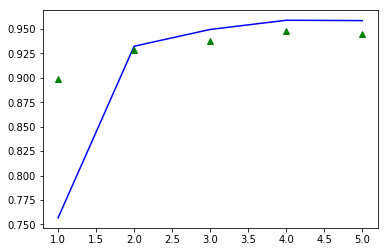

<Figure size 432x288 with 0 Axes>

In [25]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='Training_Accuracy')
plt.plot(epochs,val_acc,'g^',label='Validation_Accuracy')
plt.figure()
plt.show()

### Plot training and validation Loass

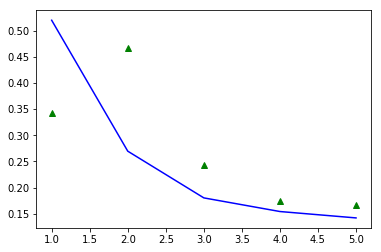

In [27]:
plt.plot(epochs,loss,'b',label='Training_Loss')
plt.plot(epochs,val_loss,'g^',label='Validation_Loss')
plt.show()

### End of study